# Convolutional Neural Network (CNN): CIFAR-10

Model 1: From Scratch CNN

In [28]:
import struct

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow.keras as keras
import tensorflow as tf
import tensorflow.keras.backend as K

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

In [47]:
# Load data
(train_X, train_y), (test_X, test_y) = cifar10.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [48]:
# Class labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

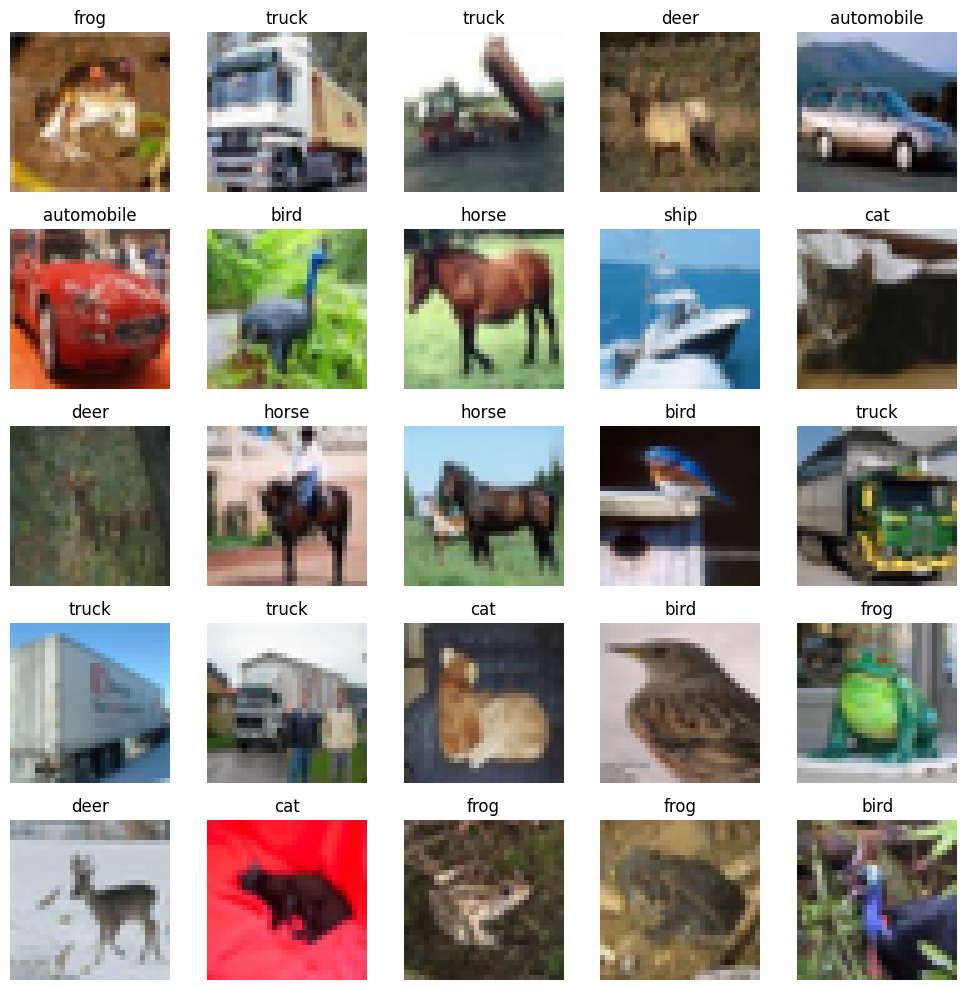

In [49]:
# plot sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_X[i])
    plt.title(classes[train_y[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# normalisation
train_X = train_X / 255.0
test_X = test_X / 255.0

# one-hot encode labels
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [52]:
# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,      # randomly rotate images up to 10 degrees
    zoom_range=0.1,         # randomly zoom image up to 10% 
    width_shift_range=0.1,  # randomly shift images horizontally up to 10%
    height_shift_range=0.1, # randomly shift images vertically up to 10%
    horizontal_flip=False,  # randomly flip images horizontally
    vertical_flip=False     # randomly flip images vertically
)
datagen.fit(train_X)

In [53]:
# build model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,705,706 (10.32 MB)

 Trainable params: 2,702,250 (10.31 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
# compile model
model.compile(
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
) 

In [ ]:
# fit model
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, # number of epochs to wait for improvement
    restore_best_weights=True # roll back to best model weights
)

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=64), # only apply data augmentation on training set
    validation_data=(test_X, test_y), 
    epochs=20,
    callbacks=[early_stopping]
) 

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.3397 - loss: 2.2188 - val_accuracy: 0.5016 - val_loss: 1.4678
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5457 - loss: 1.2899 - val_accuracy: 0.6470 - val_loss: 1.0257
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6205 - loss: 1.0757 - val_accuracy: 0.6750 - val_loss: 0.9907
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6585 - loss: 0.9712 - val_accuracy: 0.5658 - val_loss: 1.5915
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.6883 - loss: 0.8914 - val_accuracy: 0.6860 - val_loss: 0.9672
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7155 - loss: 0.8186 - val_accuracy: 0.6901 - val_loss: 0.9953
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7281 - loss: 0.7884 - val_accuracy: 0.7439 - val_loss: 0.7773
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.7406 - loss: 0.7476 - 

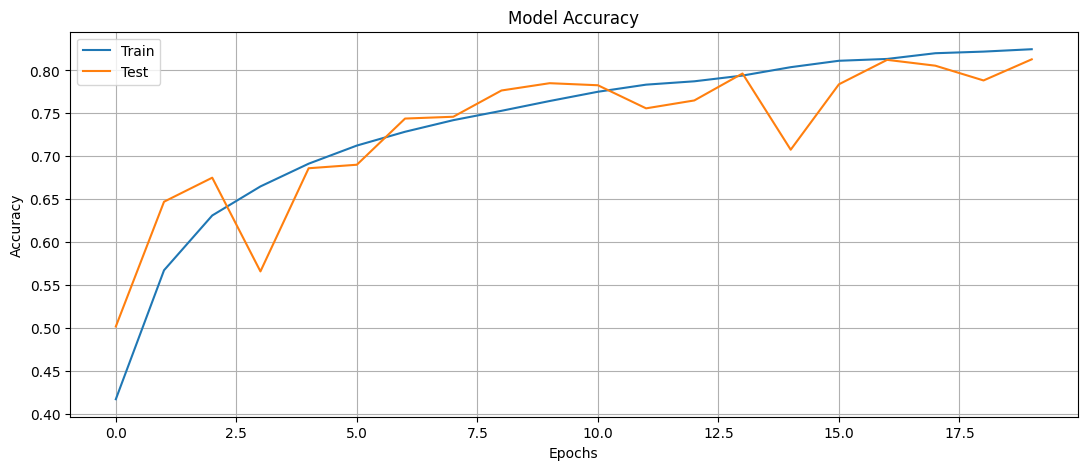

In [56]:
# evaluate model 
plt.figure(figsize=(13, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.8123
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.84      0.96      0.89      1000
           2       0.83      0.67      0.74      1000
           3       0.74      0.58      0.65      1000
           4       0.71      0.86      0.78      1000
           5       0.80      0.71      0.75      1000
           6       0.73      0.94      0.82      1000
           7       0.88      0.86      0.87      1000
           8       0.87      0.90      0.89      1000
           9       0.87      0.87      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



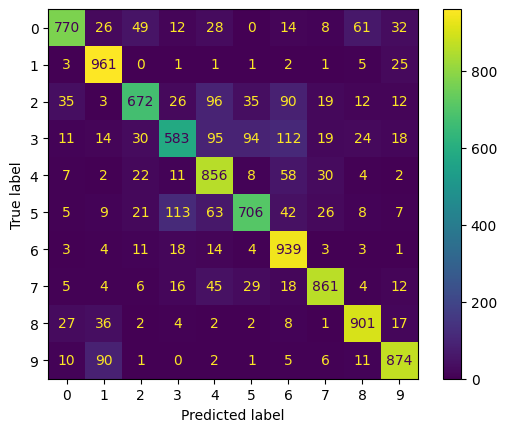

In [57]:
# evaluate
y_probs = model.predict(test_X)
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(test_y, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Misclassified = 1877


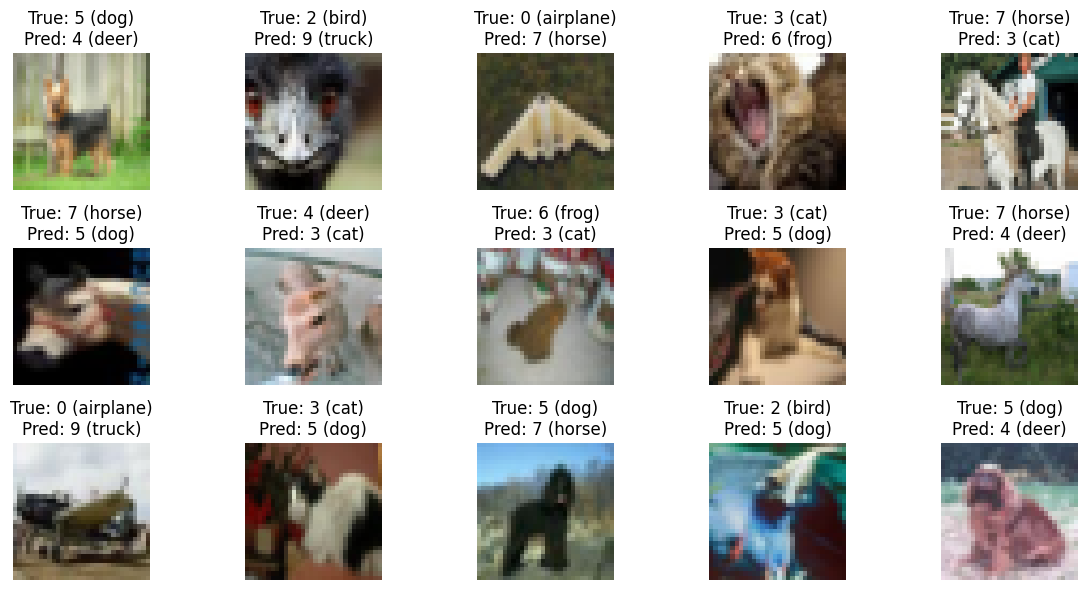

In [62]:
# evaluate misclassified images
misclassified = np.where(y_pred != y_true)[0]
num_miscl = len(misclassified)
print(f"Misclassified = {num_miscl}")

n_cols = 5
remainder = num_miscl % n_cols
n_rows = int(((num_miscl - remainder) / n_cols) + remainder)
row_limit = 3

if row_limit != None:
    n_rows = row_limit
plt.figure(figsize=(12, n_rows*2))
for i, idx in enumerate(misclassified[:num_miscl]):
    if i == n_cols*n_rows: break
    true_class_id = y_true[idx]
    true_class_name = classes[true_class_id]
    pred_class_id = y_pred[idx]
    pred_class_name = classes[pred_class_id]
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(test_X[idx].squeeze(), cmap='gray')
    plt.title(f"True: {true_class_id} ({true_class_name})\nPred: {pred_class_id} ({pred_class_name})")
    plt.axis('off')
plt.tight_layout()
plt.show()

Model 2: Transfer Learning - MobileNetV2

In [68]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Load data
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

# Resize from 32x32 to 96x96 for MobileNetV2
train_X = tf.image.resize(train_X, [96, 96])
test_X = tf.image.resize(test_X, [96, 96])

# Preprocess using MobileNetV2's preprocess_input
train_X = preprocess_input(train_X)
test_X = preprocess_input(test_X)

# one-hot encode labels
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

In [ ]:
base_model = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base

# Add new classification head
inputs = Input(shape=(96, 96, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

In [81]:
# compile model
model.compile(
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
) 

In [ ]:
# fit model
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5, # number of epochs to wait for improvement
    restore_best_weights=True # roll back to best model weights
)

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=64), # only apply data augmentation on training set
    validation_data=(test_X, test_y), 
    epochs=10,
    callbacks=[early_stopping]
) 

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 124ms/step - accuracy: 0.6803 - loss: 0.9869 - val_accuracy: 0.8444 - val_loss: 0.4484
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.8000 - loss: 0.5862 - val_accuracy: 0.8515 - val_loss: 0.4250
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.8143 - loss: 0.5390 - val_accuracy: 0.8575 - val_loss: 0.4121
Epoch 4/10
345/782 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.8228 - loss: 0.5082

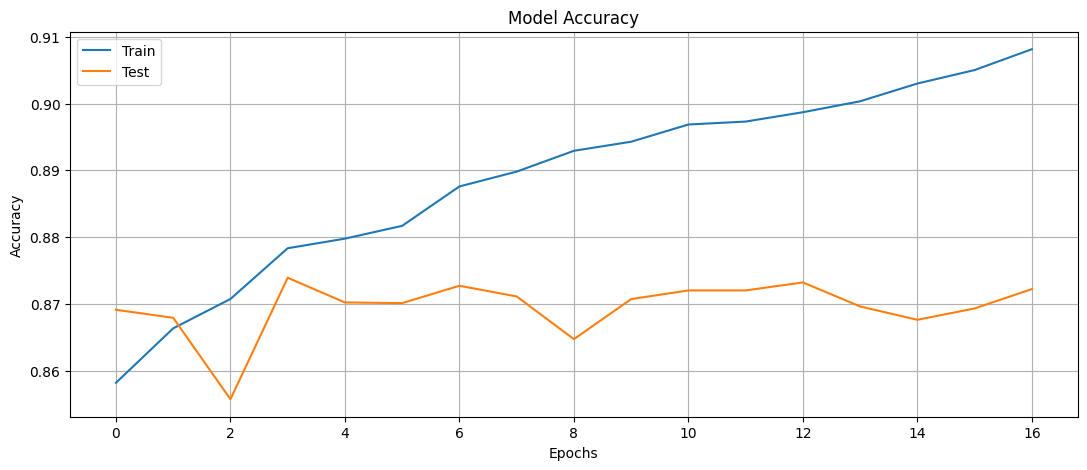

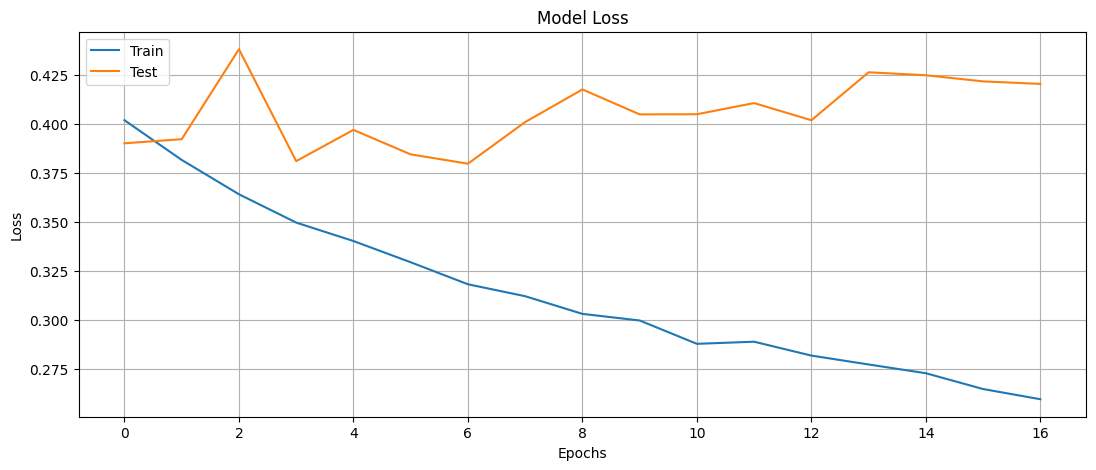

In [ ]:
# evaluate model 
plt.figure(figsize=(13, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

plt.figure(figsize=(13, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
Accuracy: 0.8727
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1000
           1       0.95      0.94      0.94      1000
           2       0.92      0.79      0.85      1000
           3       0.78      0.76      0.77      1000
           4       0.79      0.90      0.84      1000
           5       0.83      0.81      0.82      1000
           6       0.89      0.91      0.90      1000
           7       0.90      0.87      0.88      1000
           8       0.89      0.96      0.92      1000
           9       0.92      0.93      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



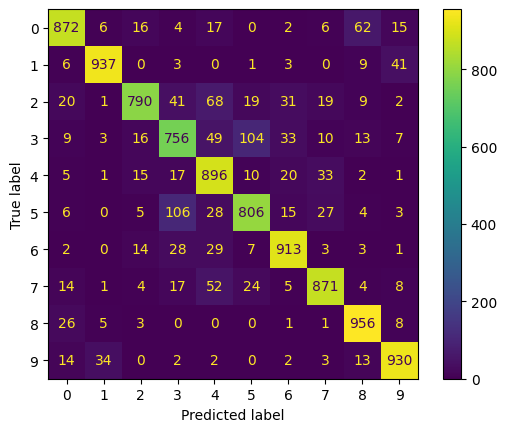

In [78]:
# evaluate
y_probs = model.predict(test_X)
y_pred = np.argmax(y_probs, axis=1)
y_true = np.argmax(test_y, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Misclassified = 1306


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'squeeze'

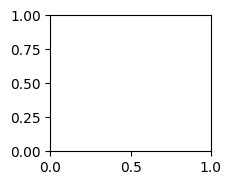

In [75]:
# evaluate misclassified images
misclassified = np.where(y_pred != y_true)[0]
num_miscl = len(misclassified)
print(f"Misclassified = {num_miscl}")

n_cols = 5
remainder = num_miscl % n_cols
n_rows = int(((num_miscl - remainder) / n_cols) + remainder)
row_limit = 3

if row_limit != None:
    n_rows = row_limit
plt.figure(figsize=(12, n_rows*2))
for i, idx in enumerate(misclassified[:num_miscl]):
    if i == n_cols*n_rows: break
    true_class_id = y_true[idx]
    true_class_name = classes[true_class_id]
    pred_class_id = y_pred[idx]
    pred_class_name = classes[pred_class_id]
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(test_X[idx].squeeze(), cmap='gray')
    plt.title(f"True: {true_class_id} ({true_class_name})\nPred: {pred_class_id} ({pred_class_name})")
    plt.axis('off')
plt.tight_layout()
plt.show() 